<a href="https://colab.research.google.com/github/dcepeda2/Cumulos-abiertos/blob/main/ccd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
from astropy.io import fits

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import pandas as pd

# statistics
from astropy.stats import biweight_location, biweight_scale, sigma_clipped_stats
from scipy.stats import median_abs_deviation

# configuration
np.set_printoptions(linewidth=120) # para que se vea
plt.rcParams["image.cmap"] = "gray" # https://matplotlib.org/stable/users/explain/colors/colormaps.html
plt.rcParams["image.origin"] = "lower"

def quantile_imshow(img,lower=0.01,upper=0.99,**kwargs):
    img_vmin = np.quantile(img,lower)
    img_vmax = np.quantile(img,upper)
    return plt.imshow(img,vmin=img_vmin,vmax=img_vmax,**kwargs)

# M-92, imágenes desde KPNO

Para cada parte del ejercicio, agregue tantas celdas de código o de Markdown como considere necesario.

## 1) Información

Obtenga el tipo de imagen, el objeto, y después el filtro de cada una de las imágenes en la carpeta `data/m92`.

Organice esta información como crea conveniente, ya sea en diferentes variables, en diccionarios, o en un DataFrame.

¿Por qué el bias no tiene filtro asignado?

In [ ]:
files = glob("data/m92/*.fit")
files

['data/m92/m92_1.fit',
 'data/m92/m92_6.fit',
 'data/m92/m92_7.fit',
 'data/m92/m92_4.fit',
 'data/m92/m92_2.fit',
 'data/m92/m92_3.fit',
 'data/m92/m92_5.fit']

In [ ]:
fil = {'Objeto':[],'Tipo':[],'Mediana':[],'Media':[]}
for file in files:
  fil['Objeto'].append(fits.getheader(file)['OBJECT'])
  fil['Tipo'].append(fits.getheader(file)['IMAGETYP'])

In [ ]:
fits.getval(files[1], "OBJECT")

'M-92 B'

In [ ]:
fits.getheader(files[2])

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                   16  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  352  /                                               
NAXIS2  =                  512  /                                               
BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
BZERO   =       0.0000000000E0  /                                               
OBJECT  = 'M-92 B  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'm92015.imh'          /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           5.671000E3  /  DATA MAX                                     
IRAF-MIN=           4.750000

## 2) Visualización

Importe todas las imágenes con `fits.getdata`. Organice estas imágenes como considere necesario, siguendo el mismo esquema que usó en el primer punto.

Haga un subplot para visualizar todas las imágenes. Puede usar la función `quantile_imshow` que usamos para el primer laboratorio.

In [ ]:
images = []
for file in files:
  images.append(fits.getdata(file))

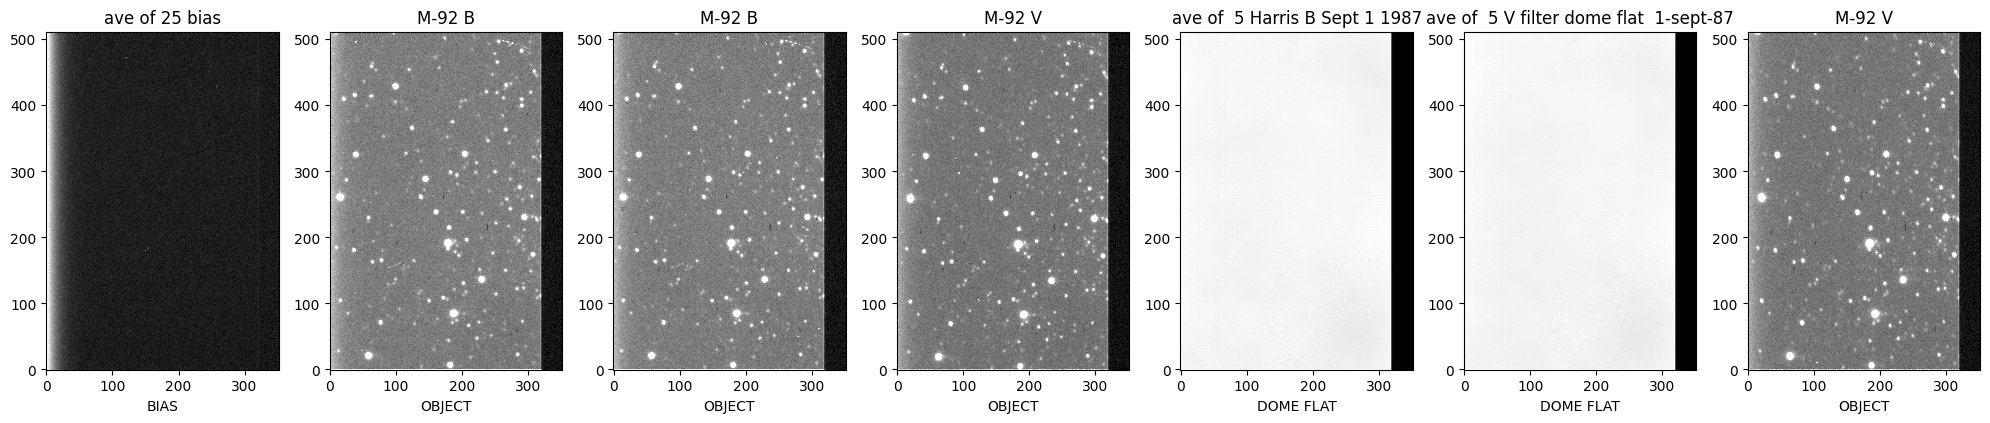

In [ ]:
def quantile_imshow(img, lower=0.01, upper=0.99, **kwargs):
    img_vmin = np.quantile(img, lower)
    img_vmax = np.quantile(img, upper)
    return plt.imshow(img, vmin=img_vmin, vmax=img_vmax, **kwargs)

fig, ax = plt.subplots(ncols=len(images), figsize=(20, 20))

for i in range(len(images)):
    plt.sca(ax[i])
    plt.title(fil['Objeto'][i])
    plt.xlabel(fil['Tipo'][i])
    quantile_imshow(images[i])

plt.tight_layout()
plt.show()



## 3) Recorte

Estas imágenes tienen algo llamado _"overscan"_. Discuta brevemente qué entiende de este término, según la explicación del profesor.

### 3.A) detalle del overscan

Grafique el promedio de los pixeles en X (`np.mean(...,axis=0)`) contra los pixeles en Y (`NAXIS1`).
Haga un zoom de su gráfica de promedio a la región de overscan. Para esto puede usar `plt.xlim` y `plt.ylim`.

Determine la región de overscan: píxel inicial y pixel final. Guarde esta información como lo considere conveniente.

Obtenga estadísticas (localización y escala) de las regiones de overscan de al menos dos de las imágenes.
¿Qué medida de localización y de escala va a usar, y por qué?

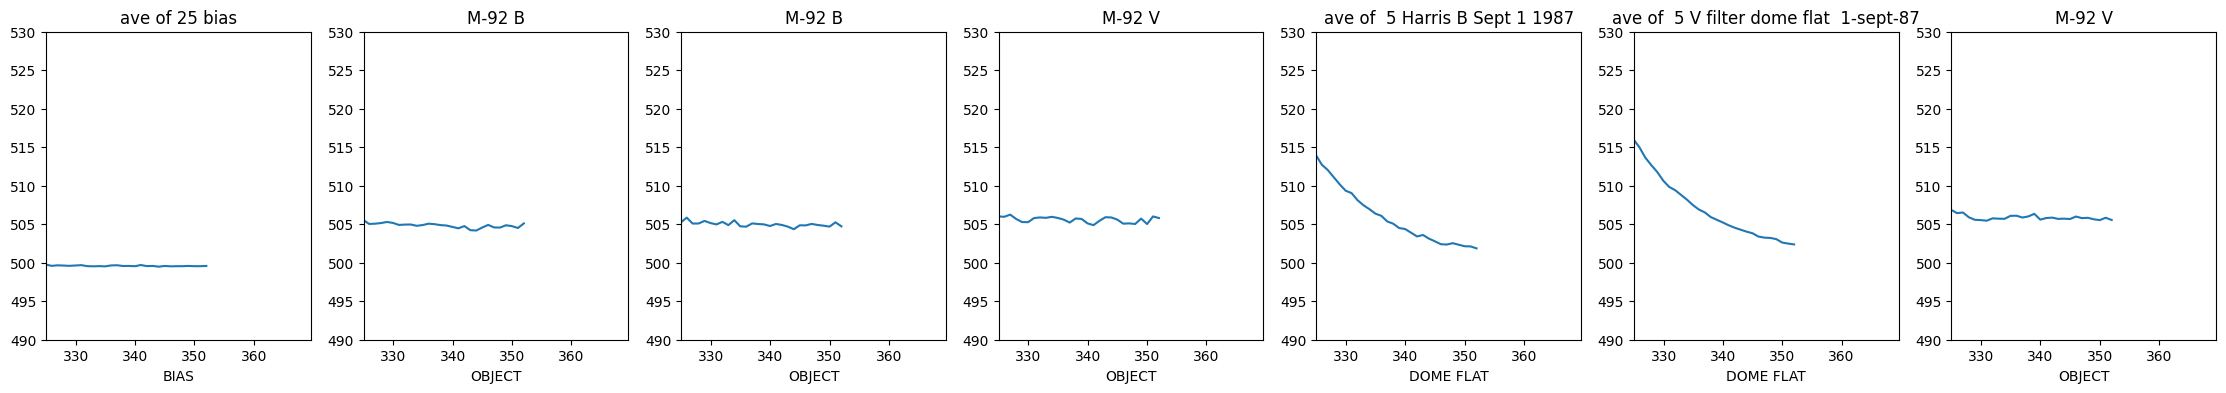

In [ ]:
X = np.mean(images,axis=0)
L = fits.getheader(files[0])
leng = L['NAXIS1']
Y = np.linspace(0,leng,leng)
fig, ax = plt.subplots(ncols=len(images), figsize=(4*len(images), 4))
for i in range(len(images)):
  plt.sca(ax[i])
  plt.title(fil['Objeto'][i])
  plt.xlabel(fil['Tipo'][i])
  X = np.mean(images[i],axis=0)
  plt.plot(Y,X)
  plt.xlim(325)
  plt.ylim(490,530)

In [ ]:
for i in range(len(images)):
  flattened = images[i][:,321:].ravel()
  fil['Media'].append(round(np.mean(flattened),2))
  fil['Mediana'].append(np.median(flattened))

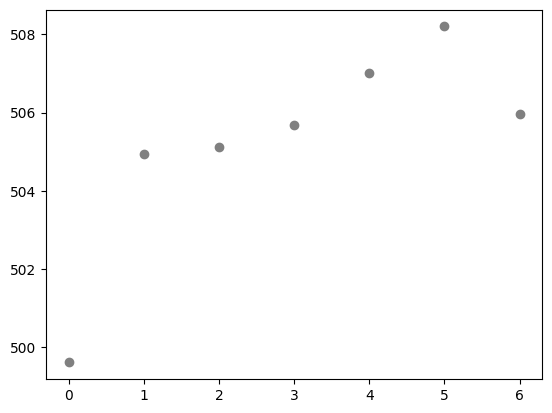

In [ ]:
plt.scatter(range(len(fil['Media'])),fil['Media'],c='grey')

### 3.B) imágenes recortadas

Remueva la región de overscan (determinada en el punto anterior) de todas las imágenes. No las modifique, sino que haga copias y guarde las imágenes recortadas como considere.

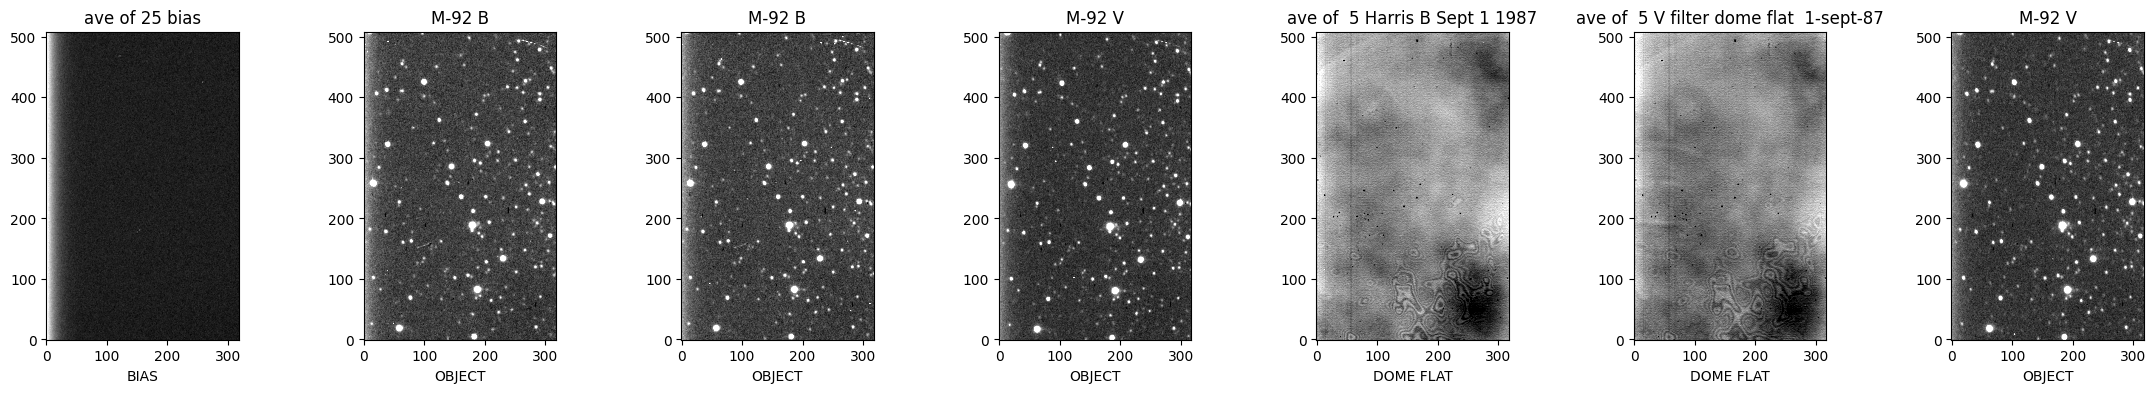

In [ ]:
fig, ax = plt.subplots(ncols=len(images), figsize=(4*len(images), 4))
fil['Imagen s/os'] = []
for i in range(len(images)):
  plt.sca(ax[i])
  plt.title(fil['Objeto'][i])
  plt.xlabel(fil['Tipo'][i])
  quantile_imshow(images[i][2:-1,:318])
  if fil['Tipo'][i] != 'BIAS':
    fil['Imagen s/os'].append(images[i][2:-1,:318])
  else:
    bias = images[i][2:-1,:318]

## 4) Bias

Remueva la imagen de bias de todas las imágenes, sean flat o ciencia. De nuevo, no las modifique, haga copias, y organice como considere.

In [ ]:
fil['Imagen s/os&b'] = fil['Imagen s/os'] - bias

array([[[  49,   44,   49, ...,   30,   62,   43],
        [  34,   38,   47, ...,   51,   52,   51],
        [  51,   33,   52, ...,   30,   38,   45],
        ...,
        [  43,   41,   59, ...,   40,   46,   55],
        [  46,   50,   52, ...,   53,   32,   62],
        [  71,   79,   95, ...,   55,   70,   69]],

       [[  50,   44,   54, ...,   42,   35,   59],
        [  28,   55,   52, ...,   41,   38,   39],
        [  35,   38,   34, ...,   41,   46,   56],
        ...,
        [  42,   33,   40, ...,   55,   49,   40],
        [  58,   48,   54, ...,   55,   54,   54],
        [  75,   80,   94, ...,   59,   60,   69]],

       [[  47,   53,   54, ...,   49,   62,   57],
        [  46,   49,   59, ...,   51,   44,   67],
        [  53,   43,   50, ...,   45,   43,   47],
        ...,
        [  52,   46,   53, ...,   41,   53,   52],
        [  47,   54,   48, ...,   61,   62,   66],
        [  86,   77,   81, ...,   71,   81,   73]],

       [[1312, 1313, 1312, ..., 1331,

In [ ]:
fil

{'Objeto': ['ave of 25 bias',
  'M-92 B',
  'M-92 B',
  'M-92 V',
  'ave of  5 Harris B Sept 1 1987',
  'ave of  5 V filter dome flat  1-sept-87',
  'M-92 V'],
 'Tipo': ['BIAS',
  'OBJECT',
  'OBJECT',
  'OBJECT',
  'DOME FLAT',
  'DOME FLAT',
  'OBJECT'],
 'Mediana': [500.0, 505.0, 505.0, 506.0, 506.0, 507.0, 506.0],
 'Media': [499.61, 504.93, 505.11, 505.68, 507.0, 508.2, 505.96],
 'Imagen s/os': [array([[577, 569, 573, ..., 532, 560, 544],
         [567, 562, 571, ..., 548, 552, 550],
         [581, 560, 576, ..., 534, 538, 543],
         ...,
         [573, 568, 584, ..., 540, 545, 553],
         [577, 574, 574, ..., 551, 533, 562],
         [601, 606, 618, ..., 556, 570, 571]], dtype='>i2'),
  array([[578, 569, 578, ..., 544, 533, 560],
         [561, 579, 576, ..., 538, 538, 538],
         [565, 565, 558, ..., 545, 546, 554],
         ...,
         [572, 560, 565, ..., 555, 548, 538],
         [589, 572, 576, ..., 553, 555, 554],
         [605, 607, 617, ..., 560, 560, 571]], dty

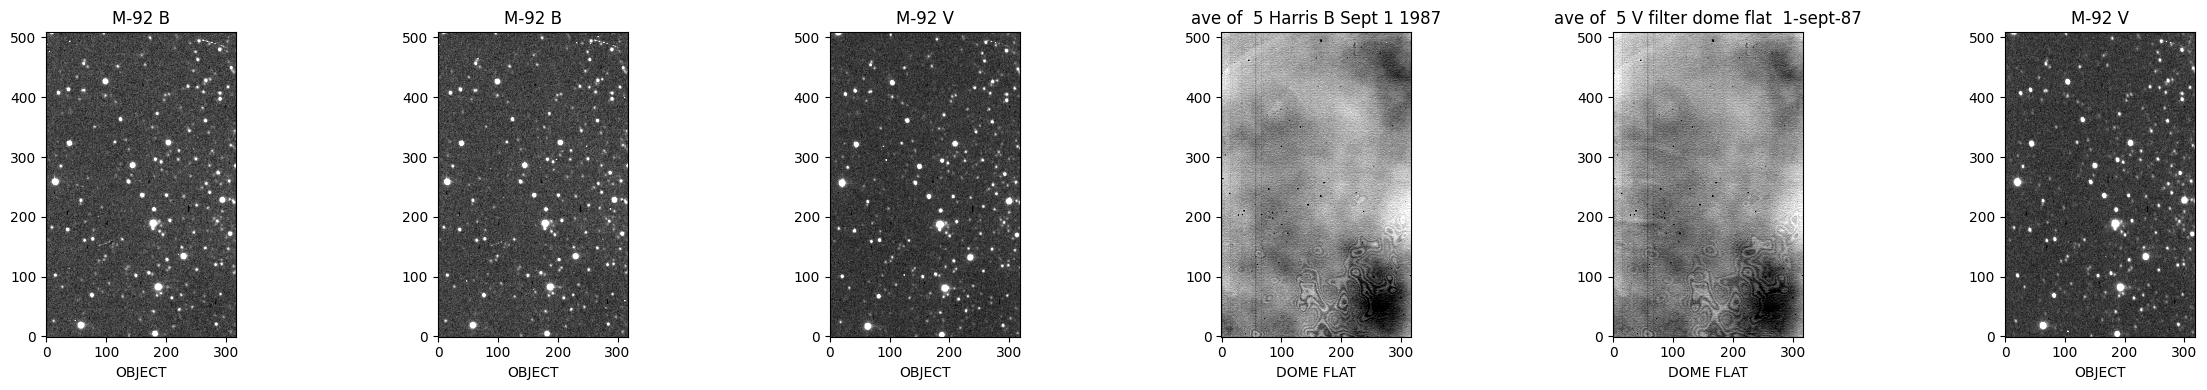

In [ ]:
fig, ax = plt.subplots(ncols=len(fil['Imagen s/os&b']), figsize=(4*len(fil['Imagen s/os&b']), 4))

for i in range(len(fil['Imagen s/os&b'])):
    plt.sca(ax[i])
    quantile_imshow(fil['Imagen s/os&b'][i])

    if fil['Tipo'][i] != 'BIAS' and i < 5:
        plt.title(fil['Objeto'][i+1])
        plt.xlabel(fil['Tipo'][i+1])
    else:
        plt.title(fil['Objeto'][i+1])
        plt.xlabel(fil['Tipo'][i+1])

plt.tight_layout()
plt.show()


### 4.extra) comparación con el overscan

Compare los valores del bias con las estádisticas que obtuvo del overscan, y comente.

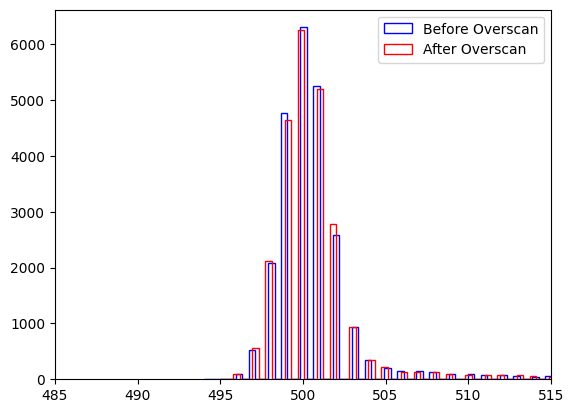

In [ ]:
datos_histograma_antes = images[0][240:310].ravel()
datos_histograma_despues = images[0][330:400].ravel()
plt.hist(datos_histograma_antes, bins=100, histtype='step',color='b',label='Before Overscan')
plt.hist(datos_histograma_despues, bins=100, histtype='step',color='r',label='After Overscan')
plt.xlim(485,515)
plt.legend()

In [ ]:
diff = np.array(np.mean((fil['Imagen s/os&b']-fil['Imagen s/os'])))
diff

array(-501.15632452)

## 5) Flat

Normalice las imágenes flat (de nuevo, ¿qué medida de localización va a usar, y por qué?), y aplique el flat a las imágenes ciencia, teniendo cuidado de usar el filtro apropiado.

In [ ]:
flats = [fil['Imagen s/os&b'][3],fil['Imagen s/os&b'][4]]

Text(0.5, 1.0, 'Flats')

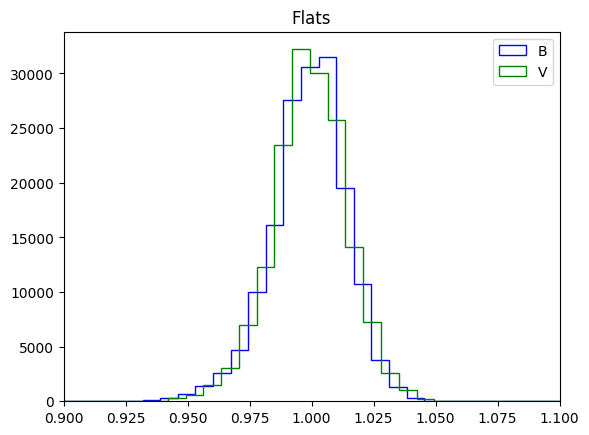

In [ ]:
flats_normalized = [np.array(flats[0])/np.median(flats[0]),np.array(flats[1])/np.median(flats[1])]
plt.hist(flats_normalized[0].ravel(), bins=150, histtype='step',color='b',label='B')
plt.hist(flats_normalized[1].ravel(), bins=150, histtype='step',color='green',label='V')
plt.xlim(0.9,1.1)
plt.legend()
plt.title('Flats')

In [101]:
SCI_B = np.array([fil['Imagen s/os&b'][0],fil['Imagen s/os&b'][1]])/flats_normalized[0]
SCI_V = np.array([fil['Imagen s/os&b'][2],fil['Imagen s/os&b'][5]])/flats_normalized[1]

b = np.array([images[1][2:-1,:318],images[2][2:-1,:318]]) - SCI_B
v = np.array([images[3][2:-1,:318],images[6][2:-1,:318]]) - SCI_V
np.mean(b),np.mean(v)


(501.16628402828985, 501.23523562299243)

## 6) Guardar las imágenes calibradas

Primero, copie los headers originales de las imágenes ciencia, y agregue un comentario describiendo **_muy brevemente_** el proceso de reducción realizado.

Para guardar sus resultados en formato fits, para cada imagen ciencia calibrada, use la función `fits.PrimaryHDU`.
Use los headers que contienen su comentario.

Una vez obtenido el objeto `PrimaryHDU`, use el método `hdu.writeto`. Ponga un nombre descriptivo, pero corto, a las imágenes resultantes.

In [ ]:
sci_headers = [fits.getheader(files[1]).copy(), fits.getheader(files[2]).copy(), fits.getheader(files[3]).copy(), fits.getheader(files[6]).copy()]
for header in sci_headers:
  header['HISTORY']='O-B-F'

In [ ]:
for i, header in enumerate(sci_headers):
    hdu = fits.PrimaryHDU(header=header)
    hdu.writeto(f'imagen_calibrada_{i}.fits', overwrite=True)

SIMPLE  =                    T  /  FITS STANDARD                                
BITPIX  =                   16  /  FITS BITS/PIXEL                              
NAXIS   =                    2  /  NUMBER OF AXES                               
NAXIS1  =                  352  /                                               
NAXIS2  =                  512  /                                               
BSCALE  =       1.0000000000E0  /  REAL = TAPE*BSCALE + BZERO                   
BZERO   =       0.0000000000E0  /                                               
OBJECT  = 'M-92 B  '            /                                               
ORIGIN  = 'KPNO-IRAF'           /                                               
DATE    = '17-09-93'            /                                               
IRAFNAME= 'm92014.imh'          /  NAME OF IRAF IMAGE FILE                      
IRAF-MAX=           4.942000E3  /  DATA MAX                                     
IRAF-MIN=           4.800000

### 6.extra)

Cree un subplot con las imágenes ciencia calibradas, con barras de color indicando las cuentas.

# Alcyone, desde el observatorio uniandes

En la carpeta `data/uniandes` hay una imagen de Alcyone, en la región de las Pléyades, junto con sus imágenes de calibración: 9 bias, 0 darks, y 3 flats.

## 1) Main-flat, main-bias, main-dark

Obtenga de nuevo los tipos de las imágenes. Promedie todos los flats, todos los bias, y todos los darks, para obtener las imágenes "master", o "main".

### 1.extra)

Usando `astropy.modeling` [(documentación aquí)](https://docs.astropy.org/en/stable/modeling/index.html), realice un model 2D del main-bias.

In [ ]:
from astropy.modeling.models import custom_model
from astropy.modeling import fitting
fitter = fitting.LevMarLSQFitter()

Para guiarse en esto, grafique los primedios de los pixeles en X y en Y. ¿Qué función se le ocurre que se comporta así?

In [ ]:
def bias_model(x,y,/,a=1,b=1,c=1,d=1):
    pass
    #return su modelo aquí
BiasModel = custom_model(bias_model)
bias_model = BiasModel()

Use el `fitter` para ajustar la imagen. Va a necesitar una grilla de pixeles como input al modelo. Yo recomiendo usar:

```python
X,Y = np.mgrid[:x_px_max,:y_px_max]
```

Donde `px_max` son la cantidad de pixeles en X y en Y.

Se recomienda analizar los residuales del modelo `main_bias - bias_model(X,Y)`; deberían ser Gaussianos y tener media cero, y su imagen debería ser plana.

¿Qué diferencia hay entre restar la imagen bias y restar el modelo, si este modelo es bueno?

## 2) Reducción

Ya que esta imagen no tiene overscan, no necesita ser recortada. Aplique directamente la calibración, incluyendo el main-dark.

Guarde la imagen calibrada en un .fits como en el ejercicio anterior.